<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [7]:
import piplite
await piplite.install('seaborn')
import seaborn as sns
import numpy as np

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-9-40e1db24932f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde = True)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

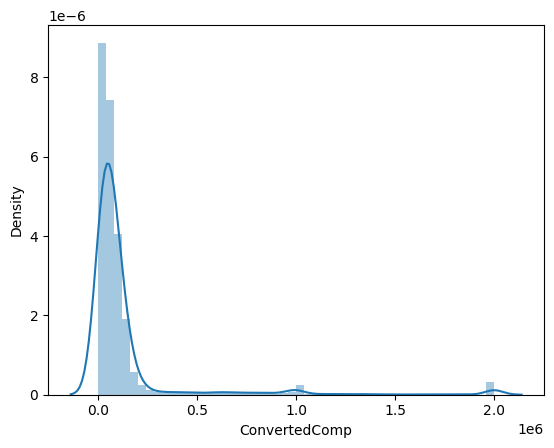

In [9]:
 sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


In [10]:
df['ConvertedComp'].dtypes

dtype('float64')

Text(0.5, 0, 'Salary')

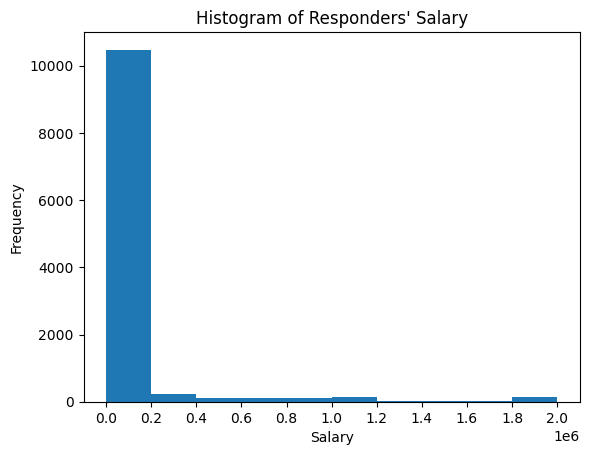

In [11]:
#df['ConvertedComp'].plot.hist()

# Alternately...
#df['ConvertedComp'].plot(kind='hist')

# Clean data
df_cc = df.copy()
df_cc['ConvertedComp'].replace('?', np.NaN, inplace=True)
mean = df_cc['ConvertedComp'].mean()
df_cc['ConvertedComp'].replace(np.NaN, mean, inplace=True)

# Get bin sizes
count, bin_edges = np.histogram(df_cc['ConvertedComp'])

# Plot
df_cc['ConvertedComp'].plot(kind='hist', xticks=bin_edges)
plt.title('Histogram of Responders\' Salary')
plt.ylabel('Frequency')
plt.xlabel('Salary')


What is the median of the column `ConvertedComp`?


In [15]:
df['ConvertedComp'].median()

# Alternately
# df['ConvertedComp'].describe()

57745.0

How many responders identified themselves only as a **Man**?


In [23]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [96]:
# Create new data frame with ONLY woman responders
df_woman = df[df['Gender'] == 'Woman']

# Find the median salary for woman
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [7]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

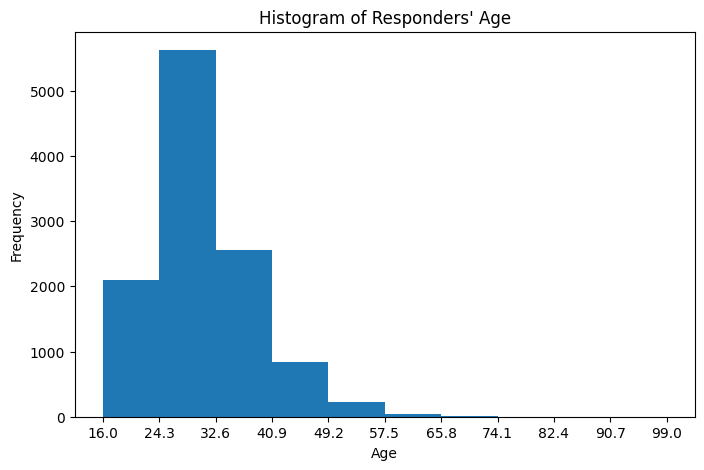

In [97]:
# Clean data aka fix missing data
df_age = df.copy()
df_age['Age'].replace('?', np.NaN, inplace=True)
mean = df_age['Age'].mean()
df_age['Age'].replace(np.NaN, mean, inplace=True)

# Get bin sizes
count, bin_edges = np.histogram(df_age['Age'])
# Plot
df_age['Age'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Responders\' Age')
plt.ylabel('Frequency')
plt.xlabel('Age')

In [54]:
# Age 24-32 has the highest responders 

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


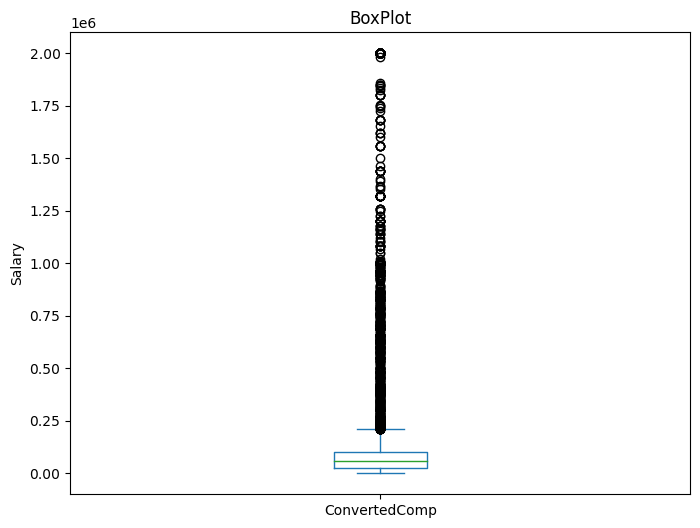

In [16]:
convertedComp = df[['ConvertedComp']]
convertedComp.plot(kind='box', figsize=(8, 6))

plt.title('BoxPlot')
plt.ylabel('Salary')

plt.show()

In [99]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [22]:
upper = Q3 + (1.5*IQR)
print('Upper Bound', upper)

lower = Q1 - (1.5*IQR)
print('Lower Bound', lower)


Upper Bound 209698.0
Lower Bound -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [57]:
# Calculate outliers below the minimum
low_outliers = df[df['ConvertedComp']< lower]
# Calculate outliers above the maximum
up_outliers = df[df['ConvertedComp']> upper]

# Total outliers
print('Number of outliers: ', len(low_outliers) + len(up_outliers))

Number of outliers:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [79]:
# New dataframe without outliers
df_no_outliers = df[df['ConvertedComp']<= upper]


In [80]:
# Median
print('**After removing outliers**')
print('Median of ConvertedComp: ',df_no_outliers['ConvertedComp'].median())

# Mean
print('Mean of ConvertedComp: ', round(df_no_outliers['ConvertedComp'].mean(), 2))

**After removing outliers**
Median of ConvertedComp:  52704.0
Mean of ConvertedComp:  59883.21


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [109]:
# Get all numeric
df_numeric = df.select_dtypes(include='number')
df_numeric.dtypes

Respondent         int64
CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
CodeRevHrs       float64
Age              float64
dtype: object

In [106]:
df_numeric.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [113]:
#Alternately...
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [ ]:
# ConvertedComp has the highest positively correlation.

# On the other hand, CodeRevHrs and Age are inversely related.

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
